# Selenium Tutorial

### What is Selenium?

Selenium is a web scraping tool used for scraping dynamic web pages. It allows you to control a web browser using python code.

In [1]:
#for interacting with web servers
import requests
#for creating dataframes
import pandas as pd
#for making regular expressions 
import re
#to not overload the web servers
import time
#for parsing html data
from bs4 import BeautifulSoup

## How to install Selenium

Step 1: Install the Python Bindings for Selenium
Can be done by doing "!pip install selenium" in the notebook or through the Anaconda Terminal using
"conda install selenium"

Step 2: Download the driver required for your browser. You can find them [here](https://selenium-python.readthedocs.io/installation.html).
Use the ChromeDriver for Chrome, SafariDriver for Safari, etc.

Step 3: Unzip the file and move the executable file to the same directory as this notebook or the notebook you are working in.

In [2]:
#Once you follow all of these instructions correctly this should work, import selenium 
import selenium.webdriver

Next we create a "driver" object which creates a connection from this python notebook to the outside web browser.

In [3]:
driver = selenium.webdriver.Chrome()

If done correctly a new browser window should open automatically.

In [4]:
#Now to go to any website, you use this. For this example we will use google.com.
driver.get("http://www.google.com")

This cell should open up google in the browser window. Now we need to get elements on the page and interact with them. Let's google something using code!

In [5]:
#In order to use keyboard and mouse buttons import this:
from selenium.webdriver.common.keys import Keys

To find different elements of the page do inspect element on the page and then find what element you are looking for. Here we are going to find the element for the search box.

In [6]:
#the find_element method locates the element
query_element = driver.find_element('name','q')

We can use send_keys to interact with the search bar and search something.

In [7]:
query_element.send_keys("CU Boulder")

Then to finish the search, tell selenium to press the enter key.

In [8]:
query_element.send_keys(Keys.ENTER)

In the search page, we can interact with the whole page and scroll down by first finding the body element of the page and then scroll down using Keys.

In [9]:
#finds the whole body of the page
body_element = driver.find_element('xpath','//body')

In [10]:
#scrolls down
body_element.send_keys(Keys.PAGE_DOWN)

This can be made into a loop to scroll even further.

In [11]:
for i in range(5):
    body_element.send_keys(Keys.PAGE_DOWN)

Make sure to ALWAYS use driver.close() when you are done using selenium. DO NOT just close the window itself.

In [12]:
driver.close()

## Using Selenium to get New York Times Data

Now we are going to use Selenium to open up New York Times and collect data from it. First, let's have our driver go to nytimes.com

In [82]:
driver = selenium.webdriver.Chrome()

In [83]:
driver.get("https://www.nytimes.com/")

Let's grab a story and see the elements inside.
From inspecting the page, it looks like the articles titles inside \<section> elements.

In [32]:
#grab the raw page contents
raw = driver.page_source.encode('utf-8')
#soupify for searching 
soup = BeautifulSoup(raw)

This element holds all of the stories on the main page.

In [58]:
sections = soup.find_all('section',{"class":"story-wrapper"})

In [59]:
len(sections)

97

Let's see what is inside one of the sections.

In [60]:
sections[0]

<section class="story-wrapper"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://legacycollection/5849edb4-40f5-5718-9cd6-28c637c8cbe2" href="https://www.nytimes.com/live/2023/10/23/world/israel-hamas-war-gaza-news"><div><div class="css-xdandi"><h5 class="css-4nvt9l"><span class="css-nch2d">LIVE<time aria-hidden="true" class="css-16lxk39" datetime="2023-10-23T22:07:16.028Z"><div class="css-ki347z"><span class="css-1stvlmo" data-time="abs">Oct. 23, 2023, 6:07 p.m. ET</span><span class="css-kpxlkr" data-time="rel">27m ago</span></div></time><span aria-live="polite" class="css-1dv1kvn">27m ago</span></span></h5><h3 class="indicate-hover css-vf1hbp">Two Additional Hostages Released From Gaza</h3></div><ul class="css-1xhq0o5"><li class="summary-class">The two women were taken to a medical center in Israel to be reunited with family, while more than 200 others are still believed to be held.</li><li class="summary-class">More deaths in Gaza were reported after Israel said it had launc

Here is how we can pull out the title of each article.

In [66]:
sections[0].find_all('h3',{"class":"indicate-hover"})[0].text

'Two Additional Hostages Released From Gaza'

Let's create a loop that grabs all of these article titles on the page.

In [67]:
articleList = []
for d in sections:
    title = d.find_all('h3',{"class":"indicate-hover"})[0].text

    
    artDict = {"Title":title}
    articleList.append(artDict)

Turn this into a dataframe!

In [73]:
articleTitlesDf = pd.DataFrame(articleList)

In [74]:
articleTitlesDf.head(10)

,Title
0,Two Additional Hostages Released From Gaza
1,War Has Smashed Assumptions About Israeli-Pale...
2,The developing world sees a double standard in...
3,More Palestinians have been killed in the West...
4,Our executive editor discusses an editors’ not...
5,92NY halted a series after its decision to pul...
6,Israel compiled raw footage of the Oct. 7 atta...
7,These are the Hamas officials believed to have...
8,"Doug Emhoff, Kamala Harris’s husband, has draw..."
9,LinkedIn issued a warning to a site shaming pr...


Let's visualize how many words are in each title.

In [75]:
lengths = []
for title in articleTitlesDf["Title"]:
    lengths.append(len(title))
articleTitlesDf["Title Length"] = lengths

In [76]:
articleTitlesDf

,Title,Title Length
0,Two Additional Hostages Released From Gaza,42
1,War Has Smashed Assumptions About Israeli-Pale...,62
2,The developing world sees a double standard in...,86
3,More Palestinians have been killed in the West...,91
4,Our executive editor discusses an editors’ not...,78
...,...,...
92,Connections Companion,21
93,Connections,11
94,Spelling Bee,12
95,The Crossword,13


And visualize it!

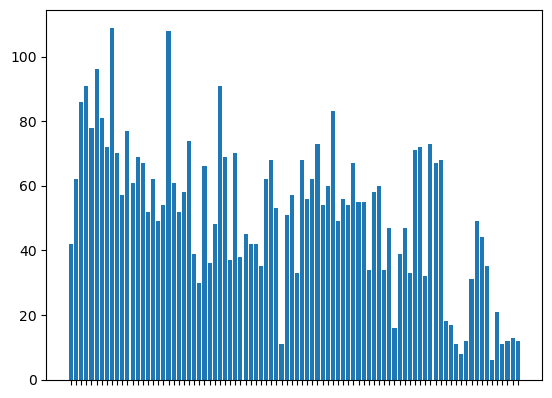

In [80]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(articleTitlesDf["Title"], articleTitlesDf["Title Length"])
ax.set_xticklabels([])
plt.tick_params(axis='x', which='major', labelsize=6)


In [81]:
#Don't forget to close the driver.
driver.close()

One way to go further with this project could be to add the read length of each article (for example "6 min read") and visualize that. I found that this is the element for how long an article would take to read.

In [92]:
sections[1].find_all("p",{"class":"css-og0y9l"})[0].text

'6 min read'